In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data into Dataframes

In [6]:
df1 = pd.read_csv('athlete_events.csv')
df = pd.read_csv('athlete_events.csv')


## Collecting basic information about data

In [7]:
df1.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
df1.shape
df1.describe()


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
missing = df1.isna().sum() 
missing[missing>0]

Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [12]:
df1.isna().sum().astype('bool')

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

## Querying Data

### Understanding boolean indexing

In [13]:
# Count/Find how many records without any medal mentioned

missing = df1.isna().sum()
print('The number of records without any medal mentined is ',missing.Medal)

The number of records without any medal mentined is  231333


In [14]:
# Count/Find most young and most old people who got Gold medal
Ages = df1[['ID','Age']]
Medals = df1[['ID','Medal']]
Age_Medal = pd.merge(Ages, Medals, on='ID')
Filtered_Gold = Age_Medal[Age_Medal['Medal'] == 'Gold']
Young_people = Filtered_Gold[Filtered_Gold.Age < 18]
Old_people = Filtered_Gold[Filtered_Gold.Age >65 ]
print('The number of young people(<18) who got gold medal is',Young_people.count().loc['ID'])
print('The number of old people(>65) who got gold medal is',Old_people.count().loc['ID'])

The number of young people(<18) who got gold medal is 2109
The number of old people(>65) who got gold medal is 14


In [15]:
df1.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [16]:
# Count/Find number of gold medals won by women of any specific country in a particular year
All_countries = df1[['Sex','Medal','Team','Year']]
#df1.groupby('Sex')['Medal'].count()
Filtered_Gold1 = All_countries[All_countries['Medal']=='Gold']#,All_countries['Sex']=='F']]
Filtered_Gold2 = Filtered_Gold1[Filtered_Gold1.Sex=='F']
#Filtered_Gold2.groupby(['Team','Year','Sex']).count()
#Filtered_Gold.groupby()

In [17]:
Filtered_Gold3 = Filtered_Gold2.value_counts().to_frame().sort_values(by='Team')

In [18]:
def Gold_by_female(country):
    condition = (Filtered_Gold3.index.get_level_values(0).isin(['F'])) \
            & ( Filtered_Gold3.index.get_level_values(1).isin(['Gold'])) \
            & ( Filtered_Gold3.index.get_level_values(2).isin([country])) #\
           # & ( Filtered_Gold3.index.get_level_values(3)==Year)
    return Filtered_Gold3.iloc[np.where(condition)]

In [19]:
Gold_by_female('China')

0
Sex Medal Team  Year    
F   Gold  China 2014   3
                1988   3
                2000  15
                2010   7
                1996   7
                2006   1
                2004  29
                2012  26
                2008  38
                1992  11
                2002   2
                2016  30
                1984  14

## Cleaning and Completing data

In [20]:
df = pd.read_csv('athlete_events.csv')

In [21]:
# Exclude all records from data where we don’t have any information about medal
df = df.loc[df['Medal'].notnull()]

In [22]:
# Fill missing age values with average age of other athletes.
average_age = round(df['Age'].mean(),0)
type(average_age)
df['Age'] = df['Age'].fillna(average_age)


In [23]:
average_age

26.0

In [24]:
df.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height    8711
Weight    9327
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

##### Fill missing height values for women and men with average height of women and men athletes respectively.

In [25]:
# Getting the average Height for women athletes
wom_avg_height = round(df[(df['Sex']=='F') & (df['Height'].notnull())]['Height'].mean(),2)

In [26]:
# Detting the average Height for men athletes
men_avg_height = round(df[(df['Sex']=='M') & (df['Height'].notnull())]['Height'].mean(),2)

In [27]:
#df1 = df.copy()
df.loc[df.Sex=='F', 'Height'] = df.loc[df.Sex=='F', 'Height'].fillna(wom_avg_height)    
df.loc[df.Sex=='M', 'Height'] = df.loc[df.Sex=='M', 'Height'].fillna(men_avg_height) 

##### Fill missing weight values for women and men with average weight of women and men athletes participating in same sports

In [28]:
df.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight    9327
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [29]:
df['Weight'] = df.groupby(['Sex','Sport'], sort=False)['Weight'].apply(lambda x: round(x.fillna(x.mean()),2))

In [30]:
df['Weight'] = df.groupby(['Sex'], sort=False)['Weight'].apply(lambda x: round(x.fillna(x.mean()),2))

In [31]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

 ### Data Visualisation

#### Gold medals in gymnastic over age

In [32]:
Gym_Gold = df.loc[(df.Medal=='Gold') & (df.Sport=='Gymnastics')].groupby('Age')['Medal'].count().to_frame()

In [33]:
Gym_Gold

,Medal
Age,
14.0,7
15.0,16
16.0,33
17.0,27
18.0,32
19.0,59
20.0,53
21.0,53
22.0,63


In [34]:
Gym_Gold2 = df.loc[(df.Medal=='Gold') & (df.Sport=='Gymnastics')]
Gym_Gold2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
921,521,Isak Abrahamsen,M,21.0,181.16,61.85,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Gold
1237,697,Fausto Alesio Acke (Padovini-),M,22.0,181.16,61.85,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Swedish System",Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270432,135269,Zou Kai,M,20.0,158.00,55.00,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Floor Exercise,Gold
270433,135269,Zou Kai,M,20.0,158.00,55.00,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Horizontal Bar,Gold
270434,135269,Zou Kai,M,24.0,158.00,55.00,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
270435,135269,Zou Kai,M,24.0,158.00,55.00,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,Gold


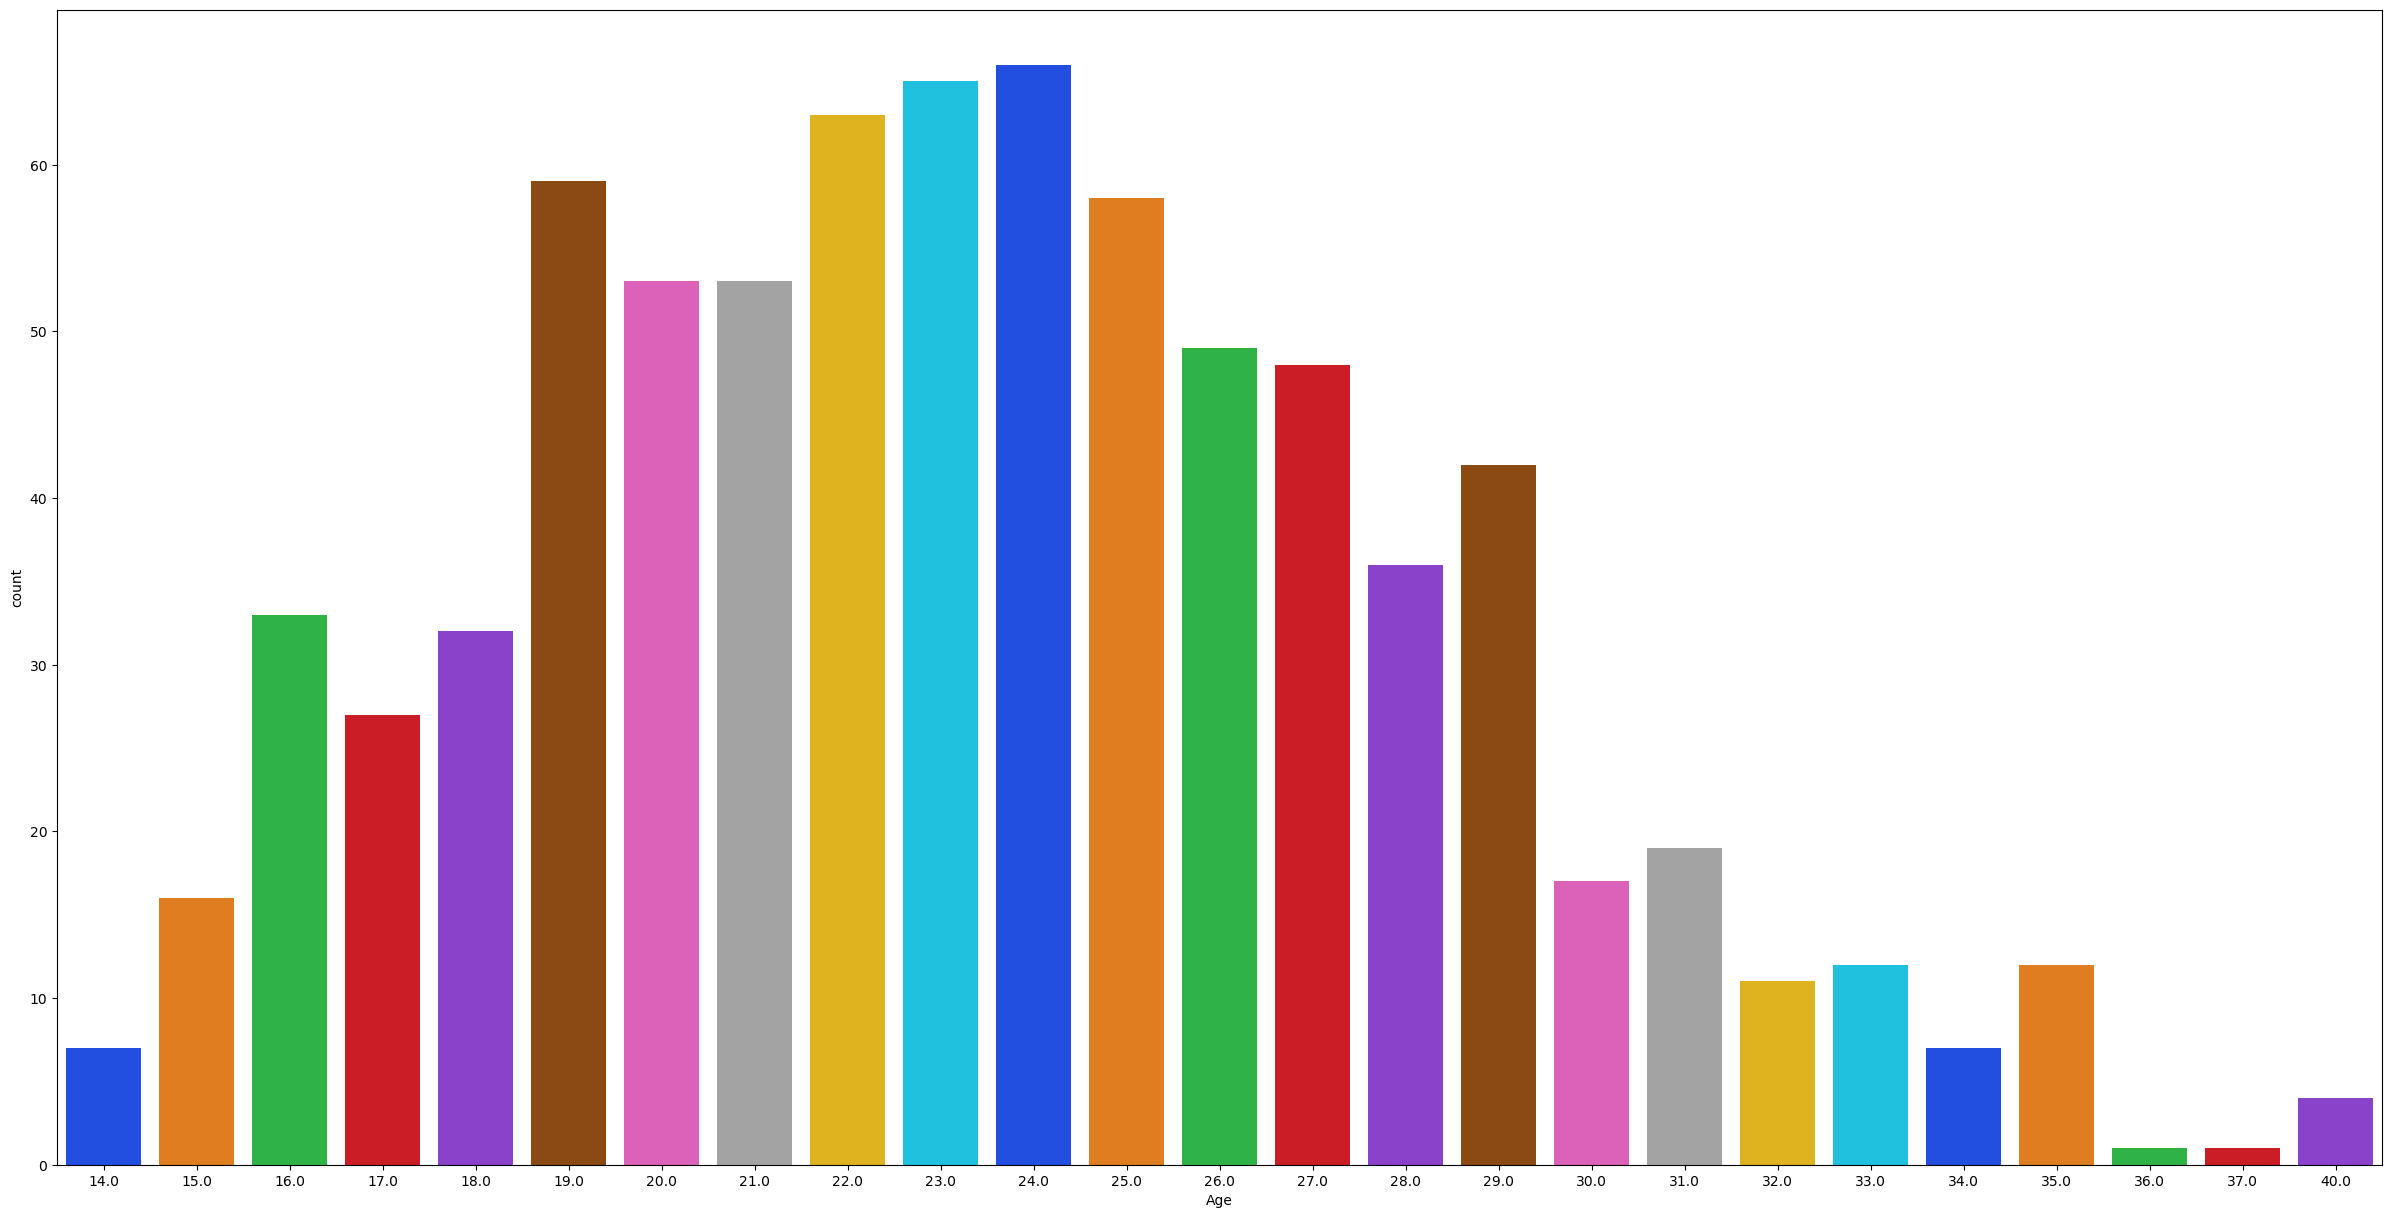

In [35]:
plt.figure(figsize=(30,15))
sns.countplot(data=Gym_Gold2, x=Gym_Gold2['Age'],
               palette='bright')#, y=Gym_Gold['Medal'])
plt.show()

In [36]:
df.loc[(df.Medal=='Gold') & (df.Sport=='Gymnastics')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
921,521,Isak Abrahamsen,M,21.0,181.16,61.85,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Gold
1237,697,Fausto Alesio Acke (Padovini-),M,22.0,181.16,61.85,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Swedish System",Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270432,135269,Zou Kai,M,20.0,158.00,55.00,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Floor Exercise,Gold
270433,135269,Zou Kai,M,20.0,158.00,55.00,China,CHN,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Men's Horizontal Bar,Gold
270434,135269,Zou Kai,M,24.0,158.00,55.00,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
270435,135269,Zou Kai,M,24.0,158.00,55.00,China,CHN,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,Gold


From the above observations, we can clearly oberserve that athletes aged between 19 and 27 years are have been the ones winning most medals in the Gymnastics category over the years

#### Medals won by China over years

In [40]:
def medals_won_per_country(country):
    plt.figure(figsize=(15,5))
    sns.countplot(data=df, x=df.loc[df.Team==country]['Year'], hue='Medal',
               palette='bright')#, y=Gym_Gold['Medal'])
    plt.show()
    

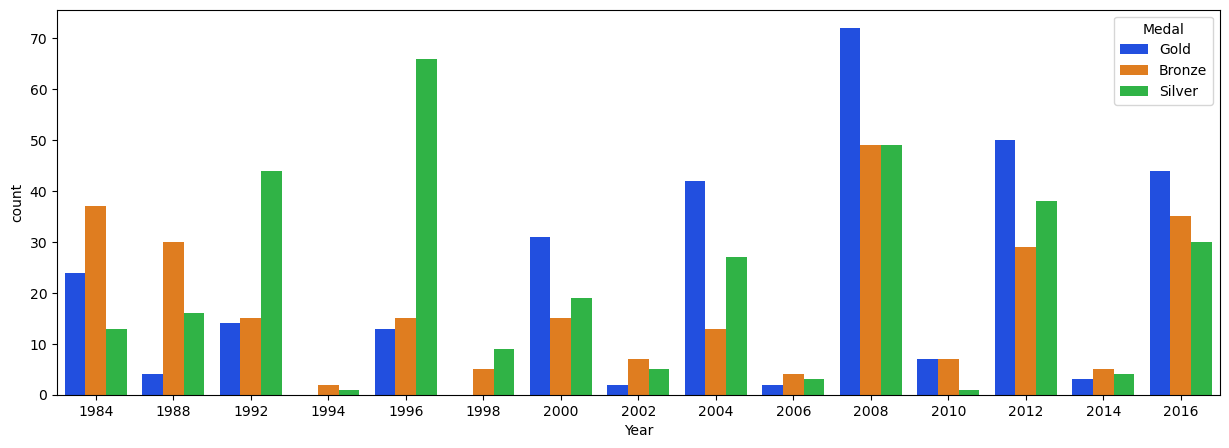

In [41]:
medals_won_per_country('China')

They year 2008 has been the most successful year from Chine as we can observe from the above graph, this year they won quite a lot of gold medals and quite considerable bronze and silver medals too

#### Gold medals won by china in summer olympics in sports

In [42]:
def summer_gold_medals(country):
    plt.figure(figsize=(15,5))
    sns.countplot(data=df, x=df.loc[(df.Team==country) & (df.Season=='Summer') & (df.Medal=='Gold')]['Sport'],
               palette='bright') #hue='Medal')#, y=Gym_Gold['Medal'])
    plt.xticks(rotation=90)
    plt.show()
    

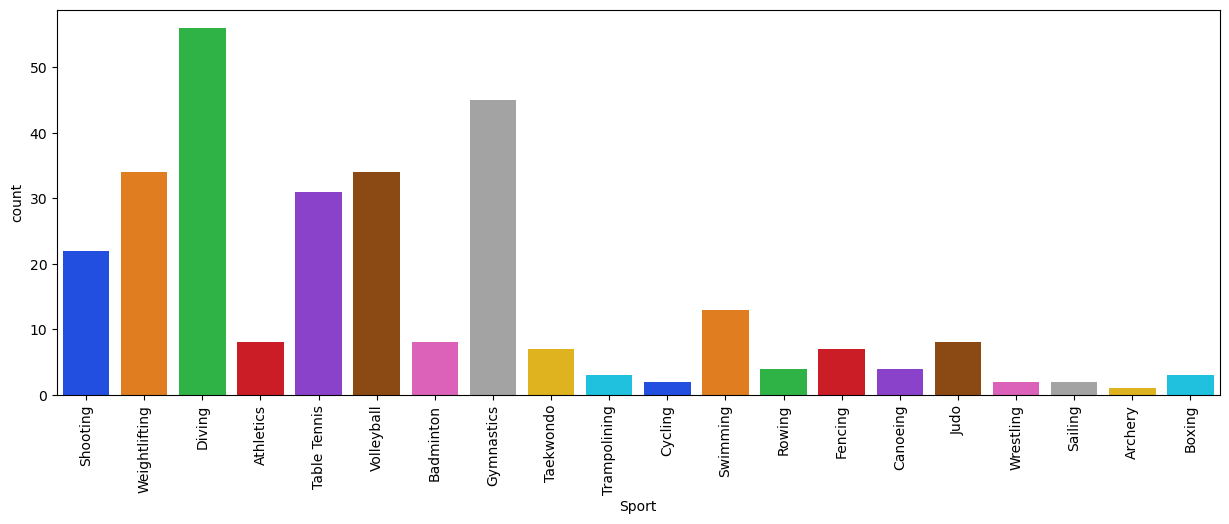

In [43]:
summer_gold_medals('China')

Diving and Gymnastics appear to be having a big share of Gold medals won by China

In [431]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,181.16,94.14,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,181.16,81.37,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,181.16,81.37,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [432]:
df.loc[(df.Team=='China') & (df.Season=='Summer') & (df.Medal=='Gold')].groupby('Sport')['Medal'].count()

Sport
Archery           1
Athletics         8
Badminton         8
Boxing            3
Canoeing          4
Cycling           2
Diving           56
Fencing           7
Gymnastics       45
Judo              8
Rowing            4
Sailing           2
Shooting         22
Swimming         13
Table Tennis     31
Taekwondo         7
Trampolining      3
Volleyball       34
Weightlifting    34
Wrestling         2
Name: Medal, dtype: int64

### Height of  athletes over years.
#### Height of male athletes over years.

In [53]:
def athletes_Heights(Sex):
    sns.set_style("darkgrid")
    dtf = df.loc[df['Sex']==Sex]
    plt.figure(figsize=(25,10))
    sns.pointplot(
    data=dtf, x=dtf['Year'], y=dtf['Height'],
    estimator='mean',join=False, palette='bright')
    plt.title('Variation of height for male athletes over time')
    #plt.tight_layout()
    plt.show()

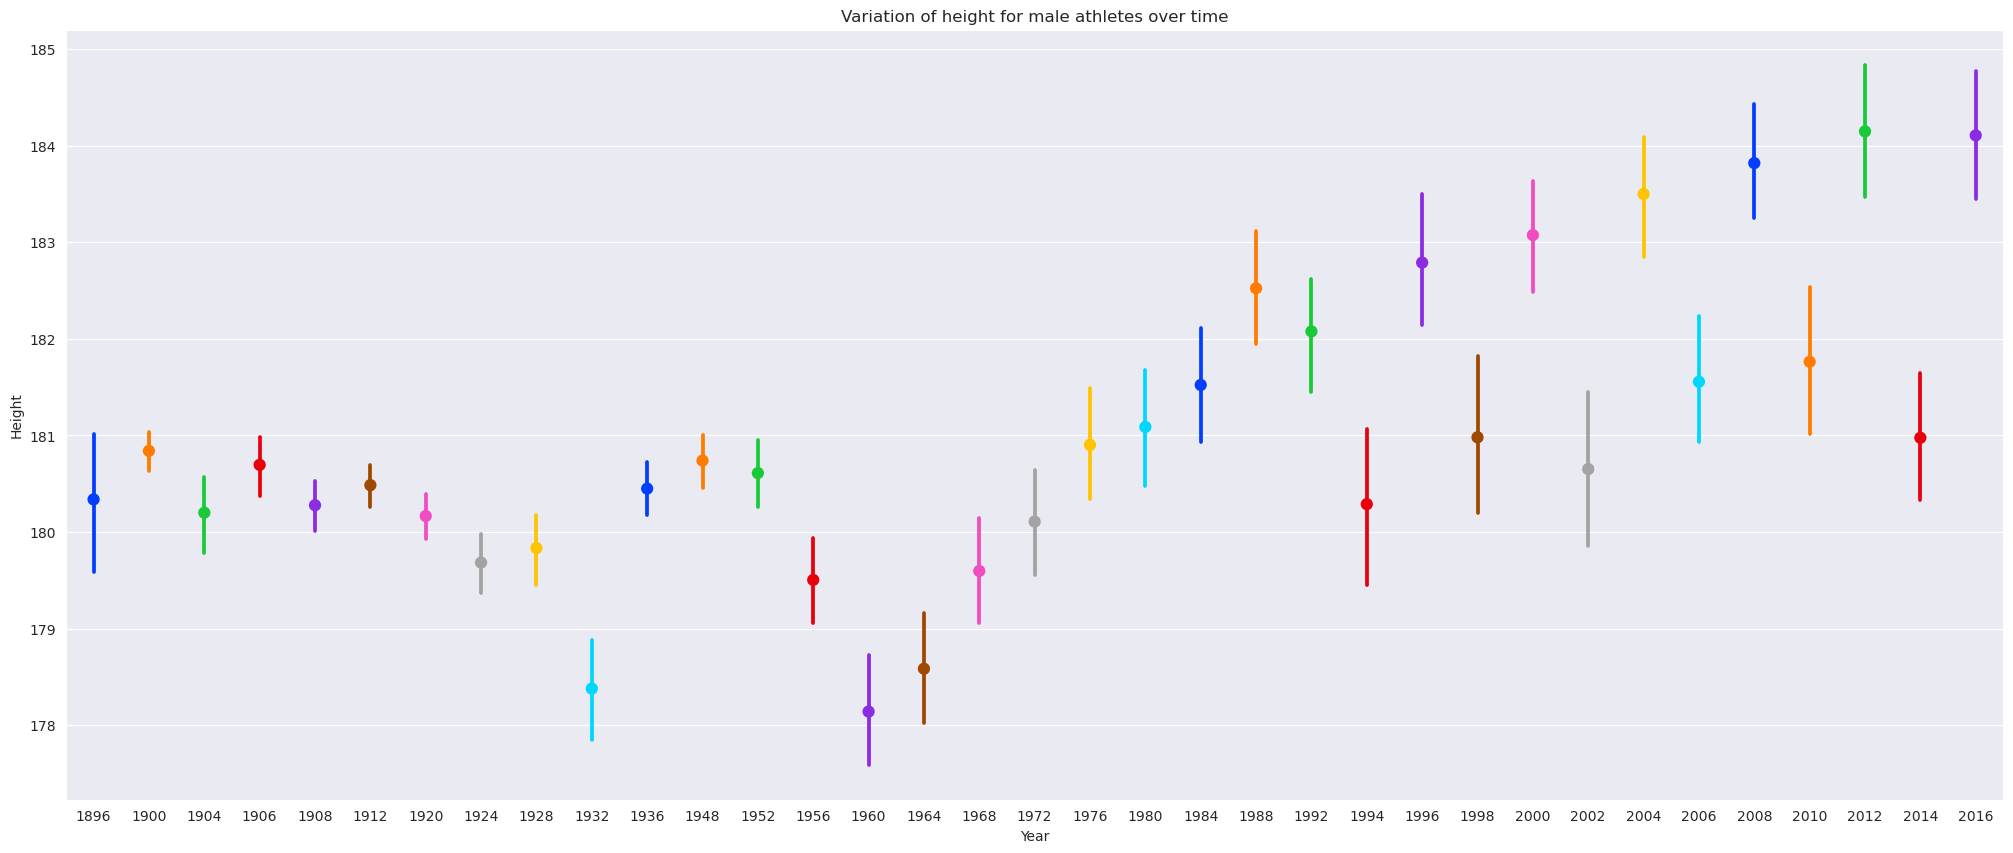

In [54]:
athletes_Heights('M')

#### Height of female athletes over years

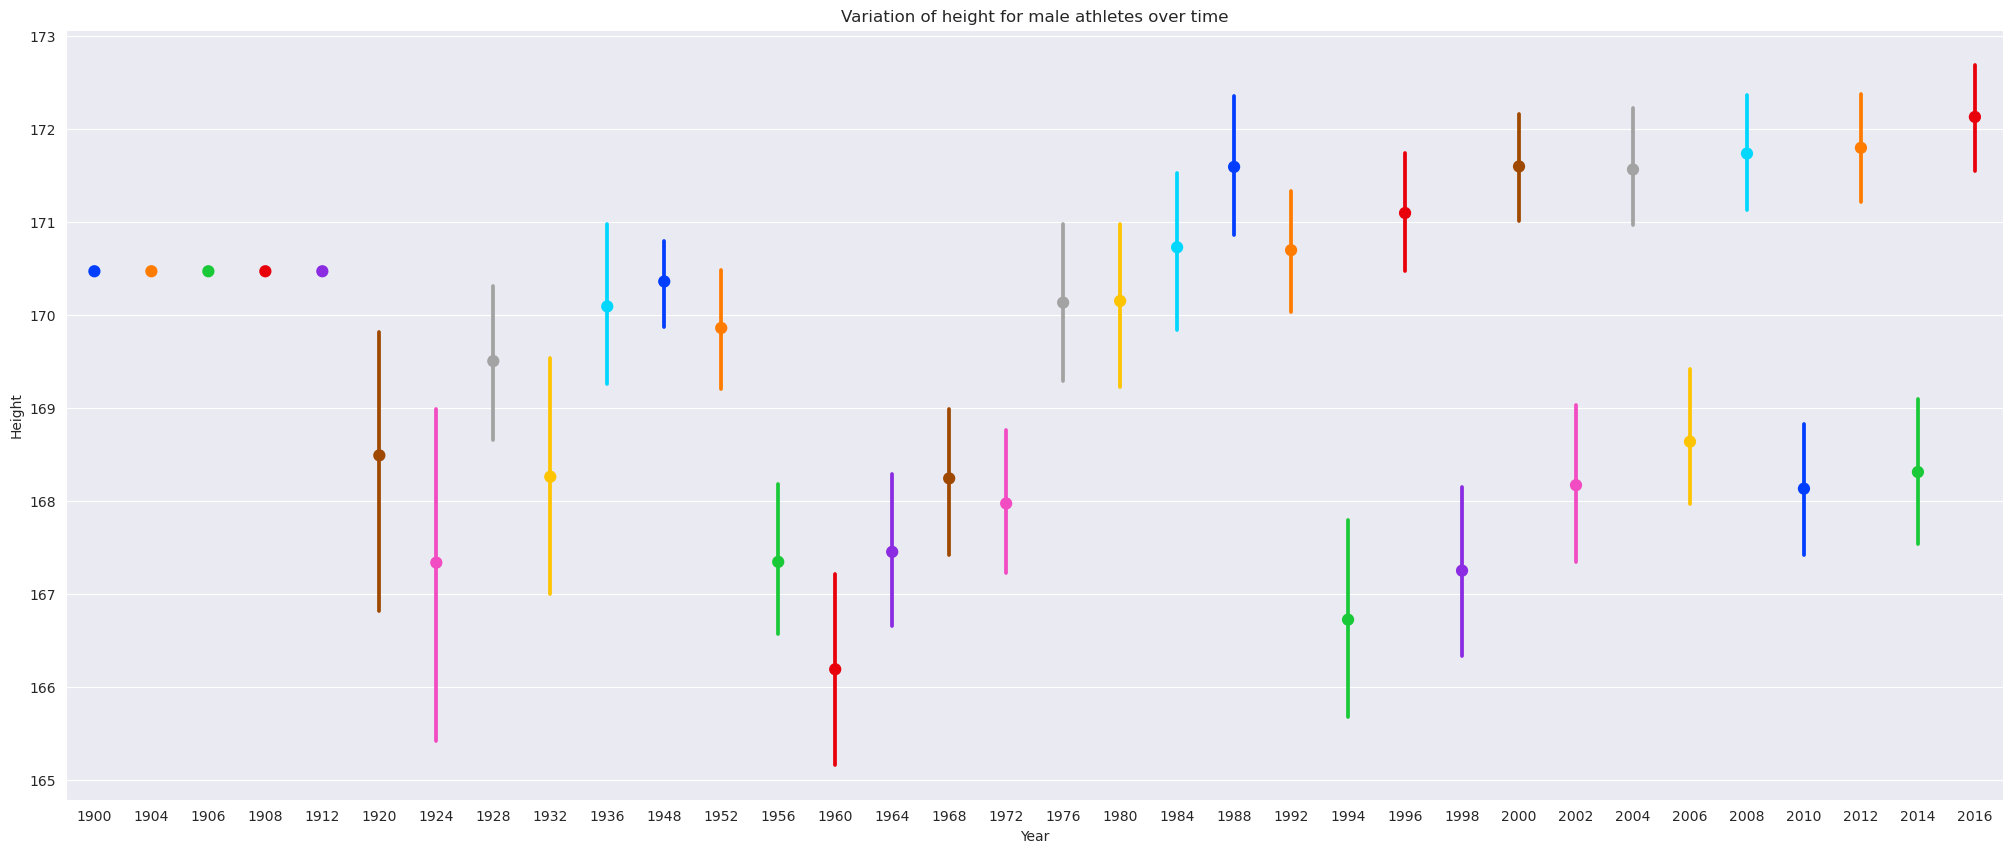

In [55]:
athletes_Heights('F')

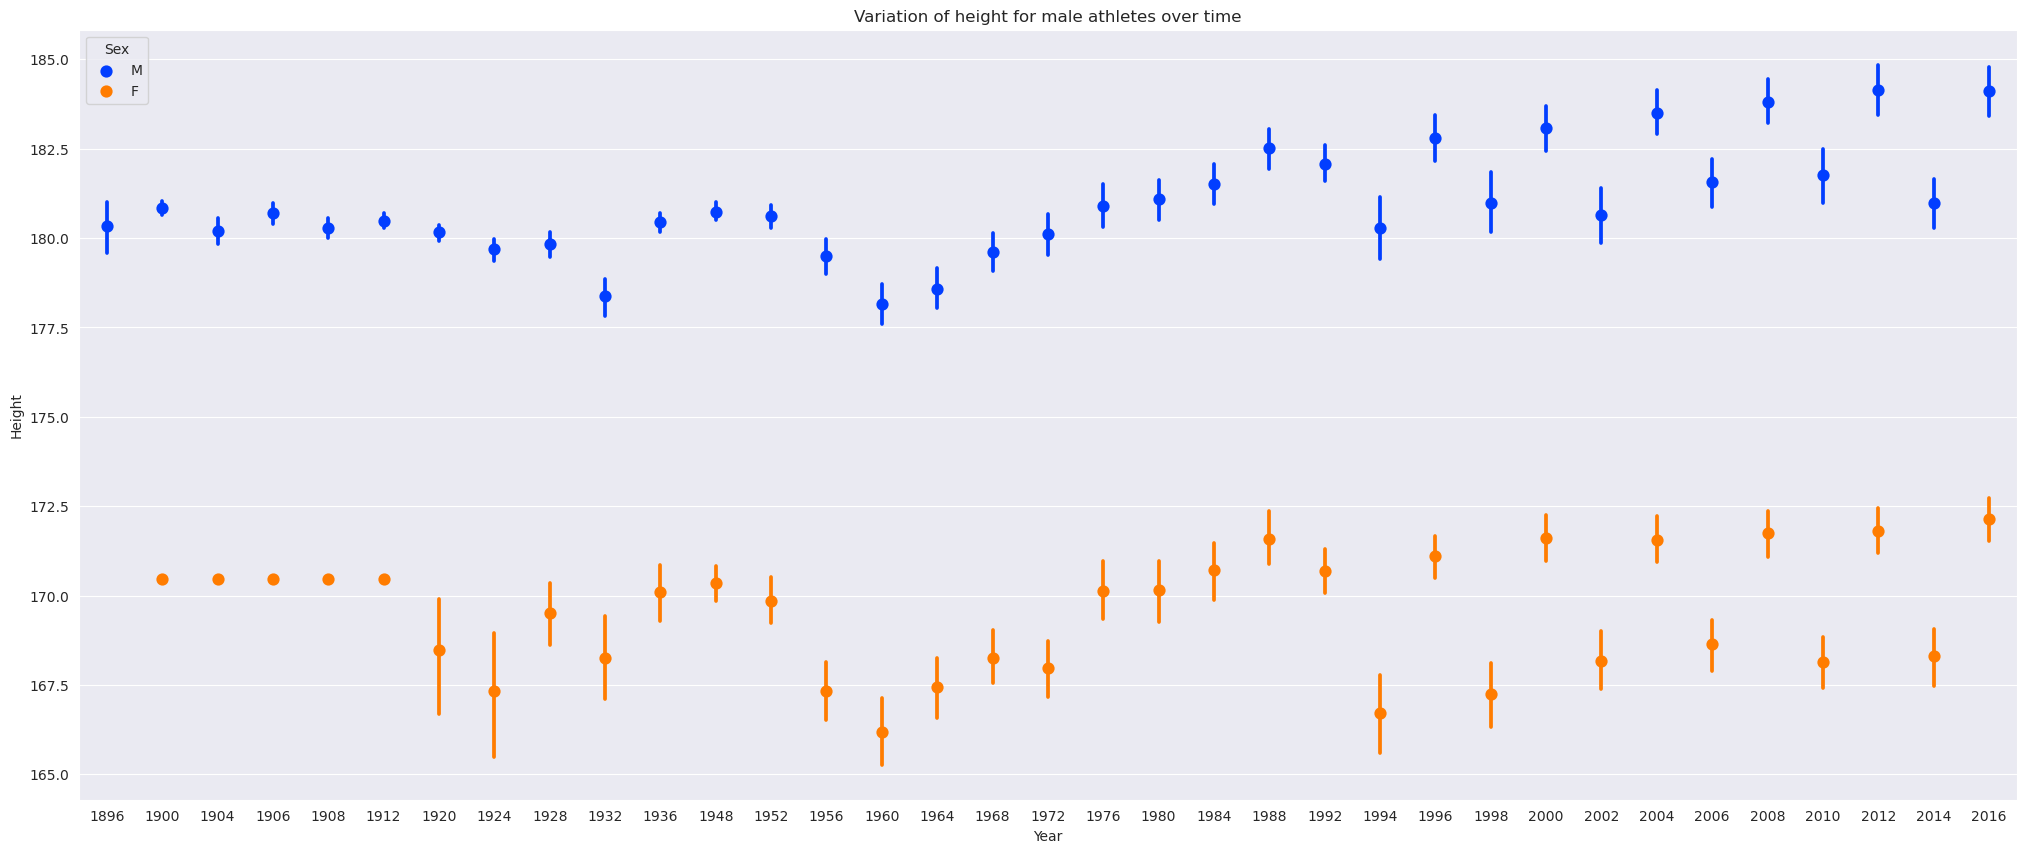

In [56]:
sns.set_style("darkgrid")
plt.figure(figsize=(25,10))
sns.pointplot(
data=df, x=df['Year'], y=df['Height'],
estimator='mean',join=False, palette='bright',hue='Sex')
plt.title('Variation of height for male athletes over time')
#plt.tight_layout()
plt.show()

From the above we notice that overall male athletes tennds to be taller than female athletes. Also male height generally varies between 178 and 184, while for female athletes it varies between 166 and 173

#### Top 5 countries with most medals

In [438]:
data_frame =df.groupby(df['Team'])['Medal'].count().sort_values(ascending=False).to_frame().head(5)

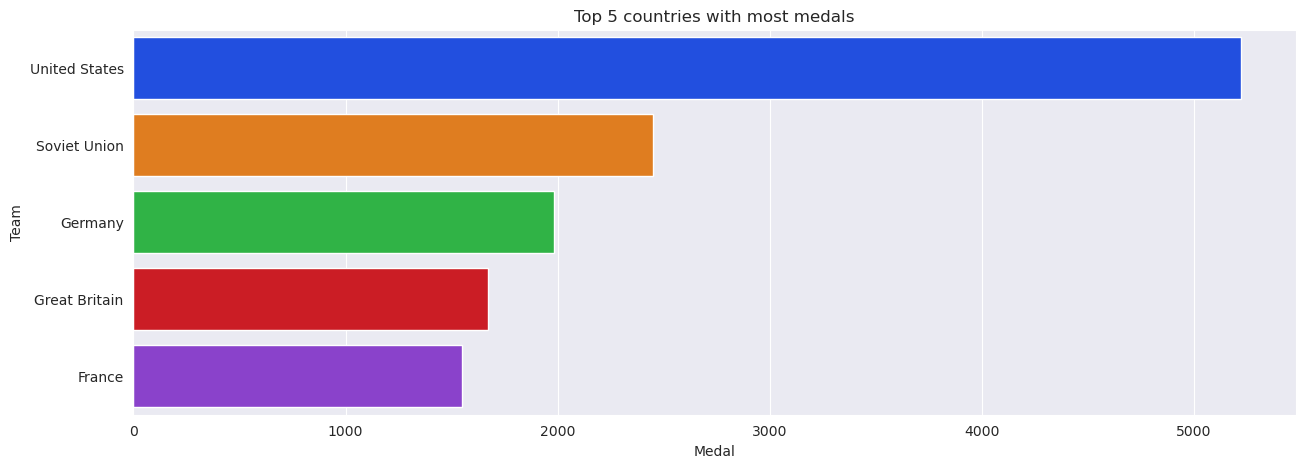

In [439]:
plt.figure(figsize=(15,5))
sns.barplot(data=data_frame, x=data_frame.Medal,y=data_frame.index,
           palette='bright') 
plt.xticks(rotation=0)
plt.title('Top 5 countries with most medals')
plt.show()

USA, Russia and Germany appear to be having the biggest shares in terms of medals won averall.

#### Number of athletes in each Olympic game

In [57]:
data_frame1 =df.groupby(df['Games'])['ID'].count().to_frame()

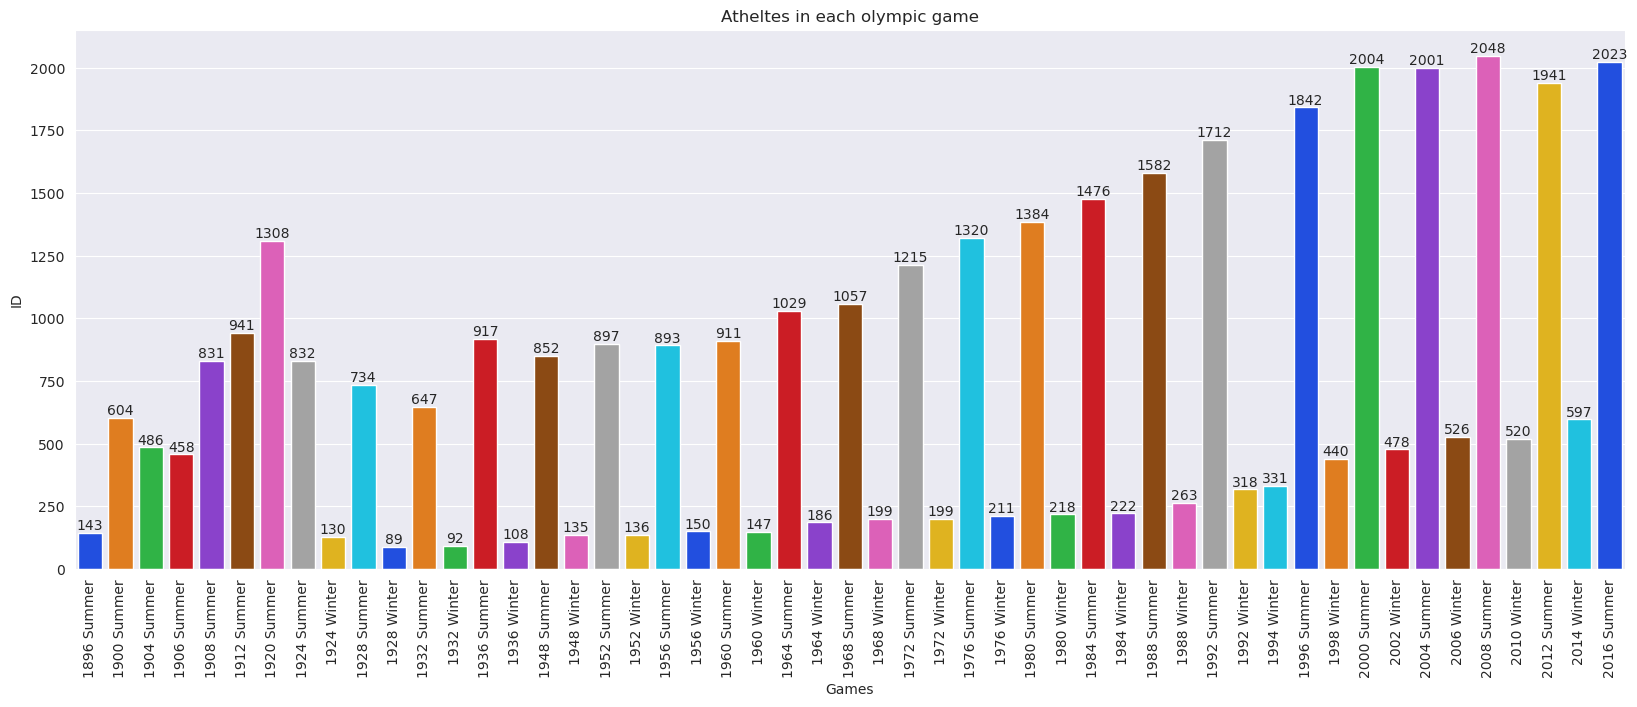

In [58]:
plt.figure(figsize=(20,7))
plot = sns.barplot(data=data_frame1, y=data_frame1.ID,x=data_frame1.index,
           palette='bright') 
plt.xticks(rotation=90)
plt.title('Atheltes in each olympic game')
#show values on barplot
plot.bar_label(plot.containers[0])
plt.show()

The above wonderfull plot we may derive two observations. Firstly there a clear difference in attendance between winter games and summer games, with summer games generally appearing to be having greater number of athletes attending compared to winter games. Secondly there a clear increase in number of athletes over the years for both winter and summer games 

#### Age distribution of males/females in Olympic games 

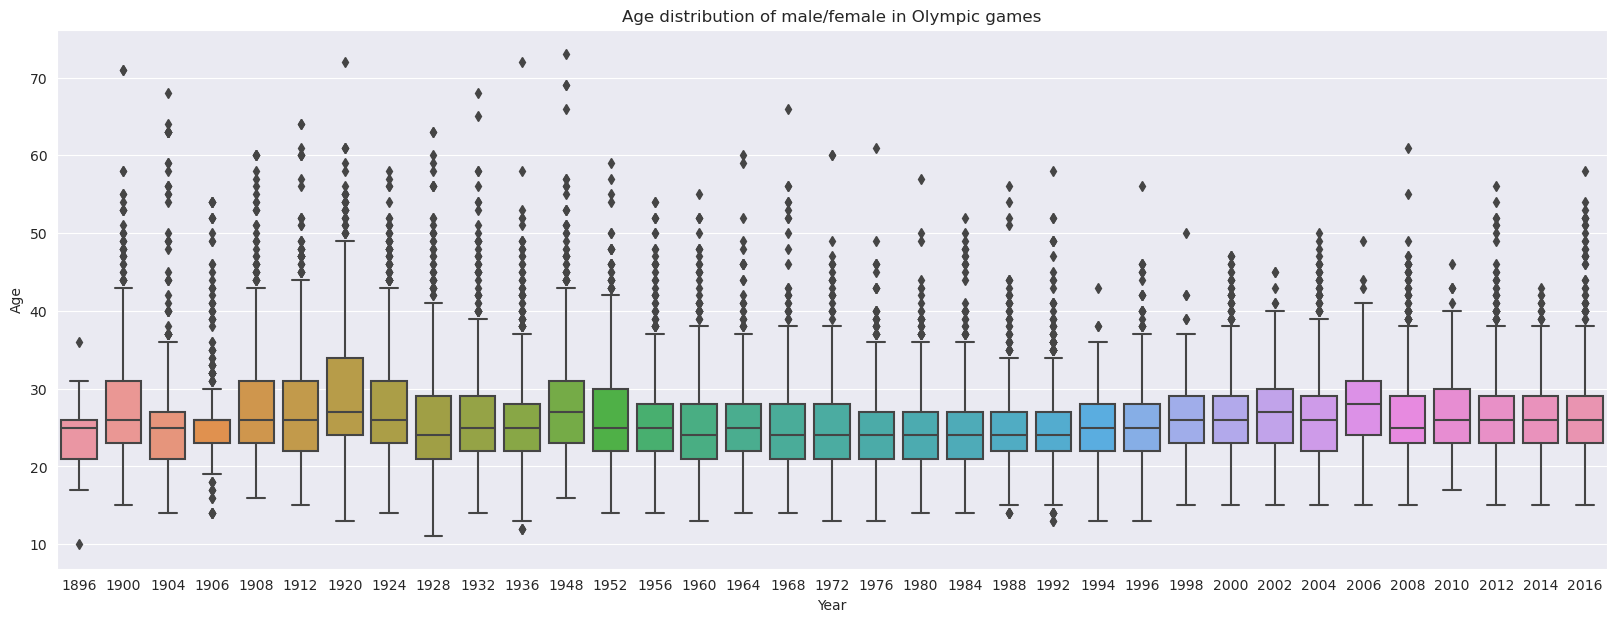

In [442]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df,x=df['Year'], y=df['Age'])
plt.title('Age distribution of male/female in Olympic games')
plt.show()

#### Variation of age for female over time

In [66]:
def age_over_years(Sex):
    data_age = df.loc[df['Sex']==Sex]
    plt.figure(figsize=(20,7))
    sns.boxplot(data=data_age,x=data_age['Year'], y=data_age['Age'])
    if Sex=='F':
        plt.title('Variation of age for female over time')
    else:
        plt.title('Variation of age for male over time')
    plt.show()

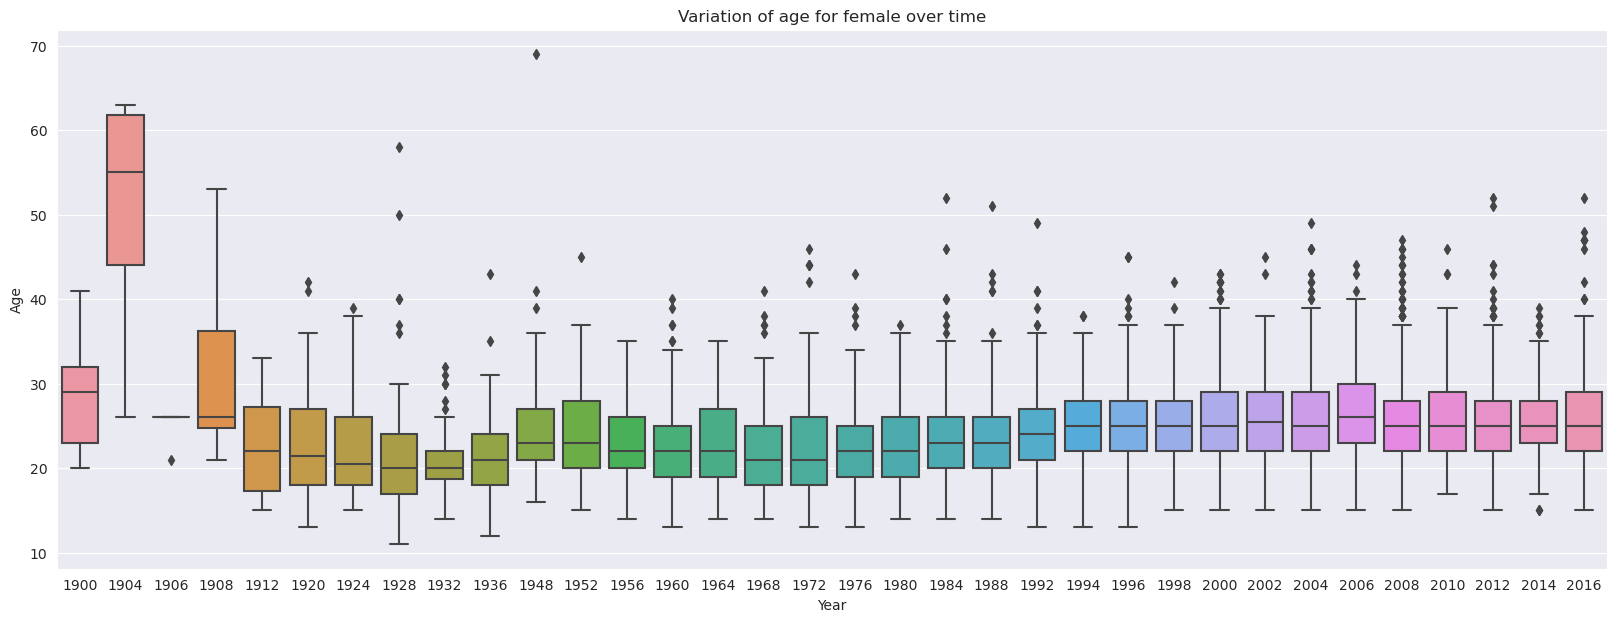

In [67]:
age_over_years('F')

#### Variation of age for male over time

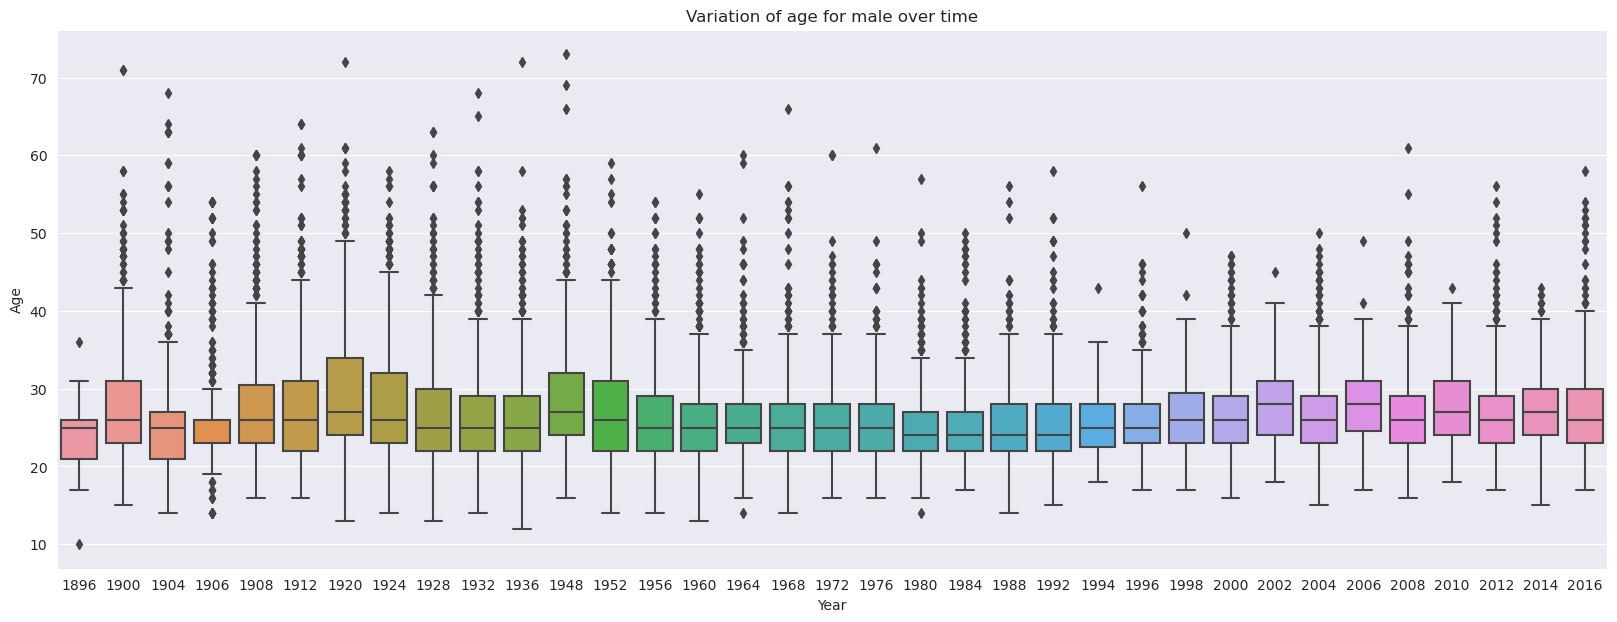

In [68]:
age_over_years('M')

We may conclude that there aren't really big variations in age of athhletes over the years for both male and female athletes as overall the age appears to be varying between 20 and 30

#### Height and Weight ratio of athletes

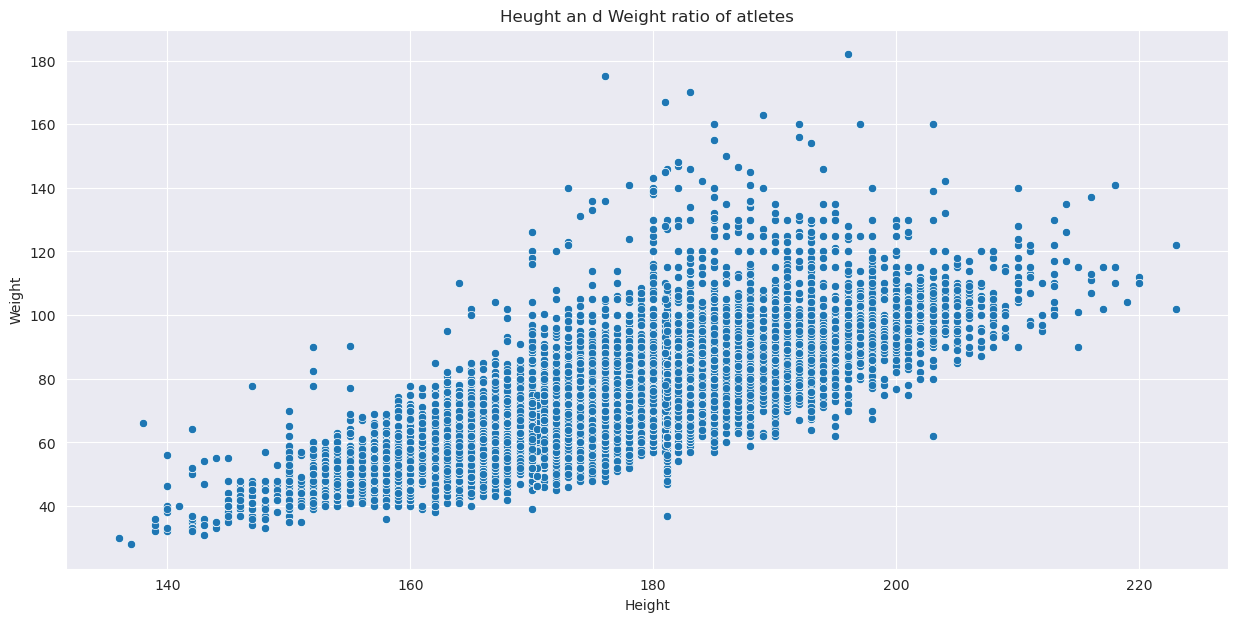

In [69]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x=df['Height'], y=df['Weight'])
plt.title('Heught an d Weight ratio of atletes')
plt.show()

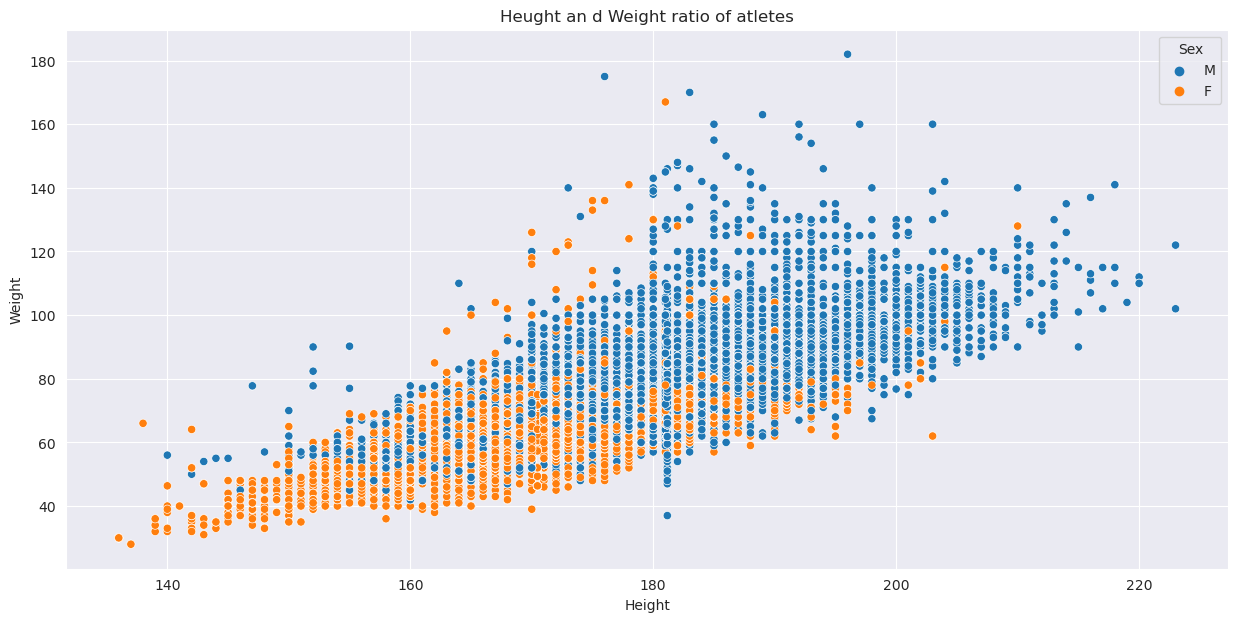

In [447]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x=df['Height'], y=df['Weight'], hue='Sex')
plt.title('Heught an d Weight ratio of atletes')
plt.show()

#### Average age of medal winners in olympic games.

In [511]:
avg_age_df = (pd.pivot_table(df, values="Age",
                                   index=["Medal"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True).astype(int))
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)

In [512]:
avg_age_df.columns

Index([ 1896,  1900,  1904,  1906,  1908,  1912,  1920,  1924,  1928,  1932,
        1936,  1948,  1952,  1956,  1960,  1964,  1968,  1972,  1976,  1980,
        1984,  1988,  1992,  1994,  1996,  1998,  2000,  2002,  2004,  2006,
        2008,  2010,  2012,  2014,  2016, 'All'],
      dtype='object', name='Year')

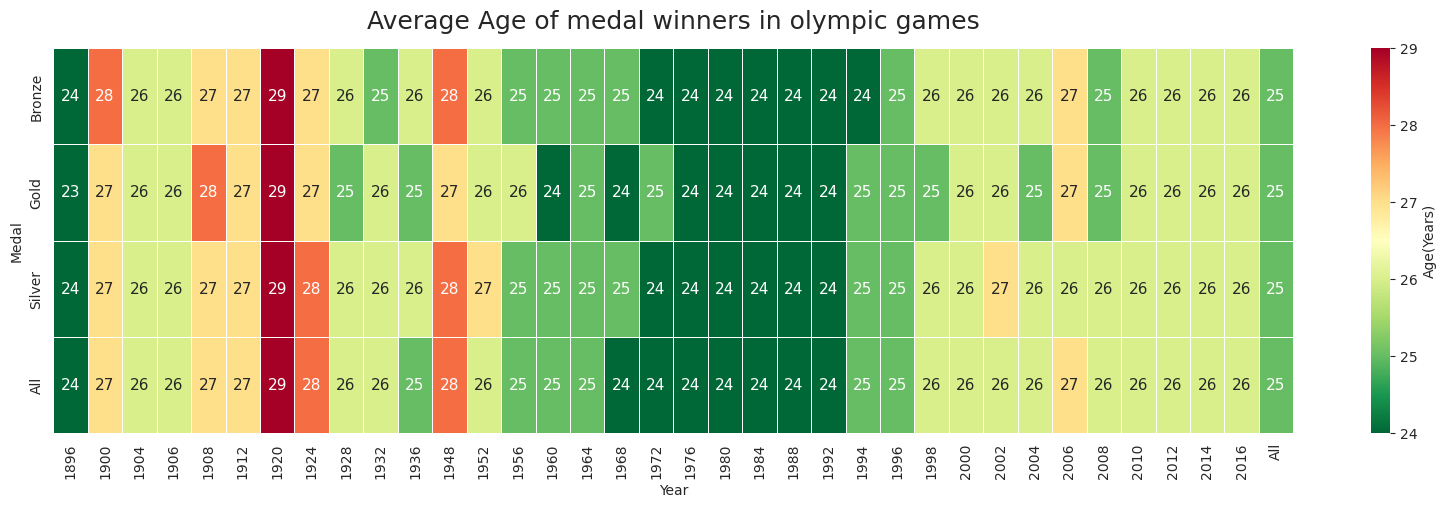

In [515]:
plt.figure(figsize=(20,5))
ax = sns.heatmap(avg_age_df, cmap='RdYlGn_r',
                 robust=True,
                 annot=True,
                 linewidths=.5,
                 annot_kws={'size':11},
                 cbar_kws={'shrink':1,
                           'label':'Age(Years)'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=90, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.ylabel('Medal')
plt.title('Average Age of medal winners in olympic games', fontdict={'fontsize':18},    pad=14);